# The Simplest Graph
Let's build a simple graph with 3 nodes and one conditional edge.

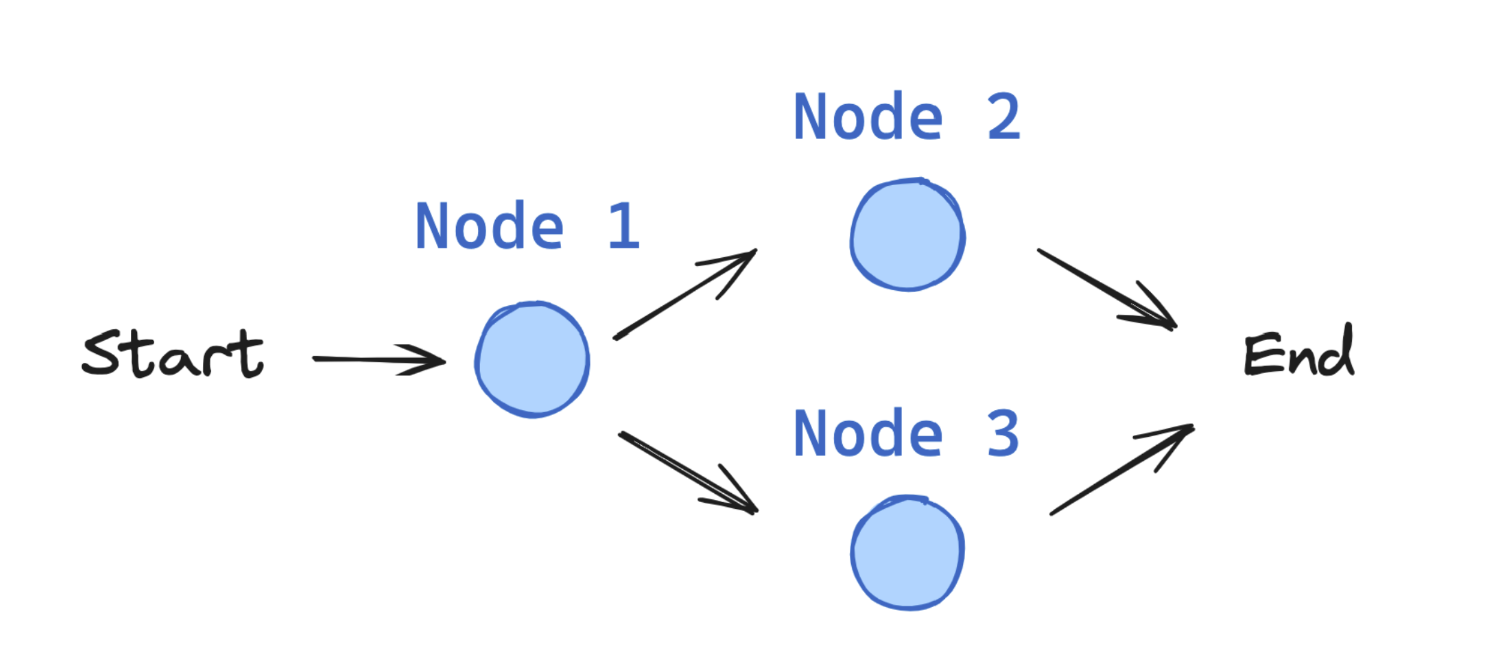

In [2]:
%%capture --no-stderr
%pip install --quiet -U langgraph

### State
First, define the State of the graph.

The State schema serves as the input schema for all Nodes and Edges in the graph.

Let's use the TypedDict class from python's typing module as our schema, which provides type hints for the keys.

In [4]:
from typing_extensions import TypedDict

class State(TypedDict):
    graph_state: str

### Nodes
Nodes are just python functions.

The first positional argument is the state, as defined above.

Because the state is a TypedDict with schema as defined above, each node can access the key, graph_state, with state['graph_state'].

Each node returns a new value of the state key graph_state.

By default, the new value returned by each node will override the prior state value.

In [5]:
def node_1(state):
    print("---Node 1---")
    return {"graph_state": state['graph_state'] +" I am"}

def node_2(state):
    print("---Node 2---")
    return {"graph_state": state['graph_state'] +" happy!"}

def node_3(state):
    print("---Node 3---")
    return {"graph_state": state['graph_state'] +" sad!"}

### Edges
Edges connect the nodes.

Normal Edges are used if you want to always go from, for example, node_1 to node_2.

Conditional Edges are used if you want to optionally route between nodes.

Conditional edges are implemented as functions that return the next node to visit based upon some logic.

In [7]:
import random
from typing import Literal

def decide_mood(state) -> Literal["node_2", "node_3"]:
    
    # Often, we will use state to decide on the next node to visit
    user_input = state['graph_state'] 
    
    # Here, let's just do a 50 / 50 split between nodes 2, 3
    if random.random() < 0.5:

        # 50% of the time, we return Node 2
        return "node_2"
    
    # 50% of the time, we return Node 3
    return "node_3"

### Graph Construction
Now, we build the graph from our components defined above.

The StateGraph class is the graph class that we can use.

First, we initialize a StateGraph with the State class we defined above.

Then, we add our nodes and edges.

We use the START Node, a special node that sends user input to the graph, to indicate where to start our graph.

The END Node is a special node that represents a terminal node.

Finally, we compile our graph to perform a few basic checks on the graph structure.

We can visualize the graph as a Mermaid diagram.

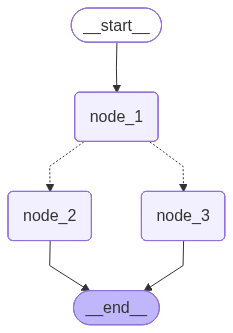

In [8]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

# Build graph
builder = StateGraph(State)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)

# Logic
builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", decide_mood)
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

### Graph Invocation
The compiled graph implements the runnable protocol.

This provides a standard way to execute LangChain components.

invoke is one of the standard methods in this interface.

The input is a dictionary {"graph_state": "Hi, this is lance."}, which sets the initial value for our graph state dict.

When invoke is called, the graph starts execution from the START node.

It progresses through the defined nodes (node_1, node_2, node_3) in order.

The conditional edge will traverse from node 1 to node 2 or 3 using a 50/50 decision rule.

Each node function receives the current state and returns a new value, which overrides the graph state.

The execution continues until it reaches the END node.

In [ ]:
graph.invoke({"graph_state" : 
"Hi, this is Viraja."})

---Node 1---
---Node 2---


{'graph_state': 'Hi, this is Viraja. I am happy!'}

invoke runs the entire graph synchronously.

This waits for each step to complete before moving to the next.

It returns the final state of the graph after all nodes have executed.

In this case, it returns the state after node_3 has completed:
    {'graph_state': 'Hi, this is Viraja. I am sad!'}

### Own implementation


In [ ]:
def node_1(state):
    print("---Node 1---")
    return {"graph_state": state['graph_state'] +" My favourite driver is"}

def node_2(state):
    print("---Node 2---")
    return {"graph_state": state['graph_state'] +" Max Verstappen."}

def node_3(state):
    print("---Node 3---")
    return {"graph_state": state['graph_state'] +" Lewis Hamilton."}

def node_4(state):
    print("---Node 4---")
    return {"graph_state": state['graph_state'] +" Charles Leclerc."}

def node_5(state):
    print("---Node 5---")
    return {"graph_state" : state['graph_state'] + " Oscar Piastri"}

In [21]:
import random
from typing import Literal

def decide_colour(state) -> Literal["node_2", "node_3", "node_4", "node_5"]:
    
    # Often, we will use state to decide on the next node to visit
    user_input = state['graph_state'] 
    a =random.random()
    if a < 0.25:
        return "node_2"
    elif ((a > 0.25) & (a < 0.50)):
        return "node_3"
    elif((a > 0.5) & (a<0.75)):
        return "node_4"
    return "node_5"

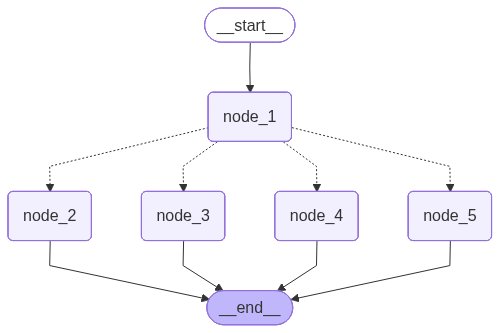

In [22]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

# Build graph
builder = StateGraph(State)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)
builder.add_node("node_4", node_4)
builder.add_node("node_5", node_5)

# Logic
builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", decide_colour)
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)
builder.add_edge("node_4", END)
builder.add_edge("node_5", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [37]:
graph.invoke({"graph_state" : "My name is Viraja."})

---Node 1---
---Node 5---


{'graph_state': 'My name is Viraja. My favourite driver isOscar Piastri'}

In [42]:
graph.invoke({"graph_state" : "My name is Viraja."})

---Node 1---
---Node 4---


{'graph_state': 'My name is Viraja. My favourite driver is Charles Leclerc.'}